![](hr1.png)

![](hr2.png)

![](hr3.png)

### From the above Problem statement we can understand that : 
### The company wants to understand what factors contributed most
### to employee turnover and to create a model that can predict 
### if a certain employee will leave the company or not.
### The goal is to create or improve different retention strategies on targeted employees.
### Overall, the implementation of this model will allow management
### to create better decision-making actions in the future.


#### __So we can say that we have classification problem since The answer of the question  will be Yes or NO.__
#### __we have two classes Attrition (Yes ) and not Attrition (No) and it is Binary classifaction__

In [1]:
## Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
## loading the dataset
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### The head() method help to display the first 4 records of our dataset.

In [4]:
data.shape

(1470, 35)

#### The data.shape show us that our dataset has 1470 records and 35 columns.

In [5]:
## let's display all the column.
pd.options.display.max_columns = None

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
for column in data.columns:
    print(data[column].value_counts())
    print('--'*20)

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
----------------------------------------
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------------
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
----------------------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Departmen

### The above __for loop using value_count()__ method help us to know which attribute has unique for values all the records and those columns are :"EmployeeCount","Over18","StandardHours", we will remove them because the not important  , We will removed also "EmployeeNumber" column because it a nominal data and act like second indexes of our dataset
 

In [7]:
## Let's remove them
data.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"],axis=1,inplace=True)

In [8]:
## verification
data.shape

(1470, 31)

### We see that our dataset has 31 column after moving unwanted columns.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

####  From data.info() we got some import informations about each column like "Dtype", "Non-Null Count" and the columns indexes too and we can see that our dataset columns have only two differents data types " int64 " and "object"...

In [10]:
## Let's check for NAN in the dataset

data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### I can see that h have no  missing values like __"NAN"__

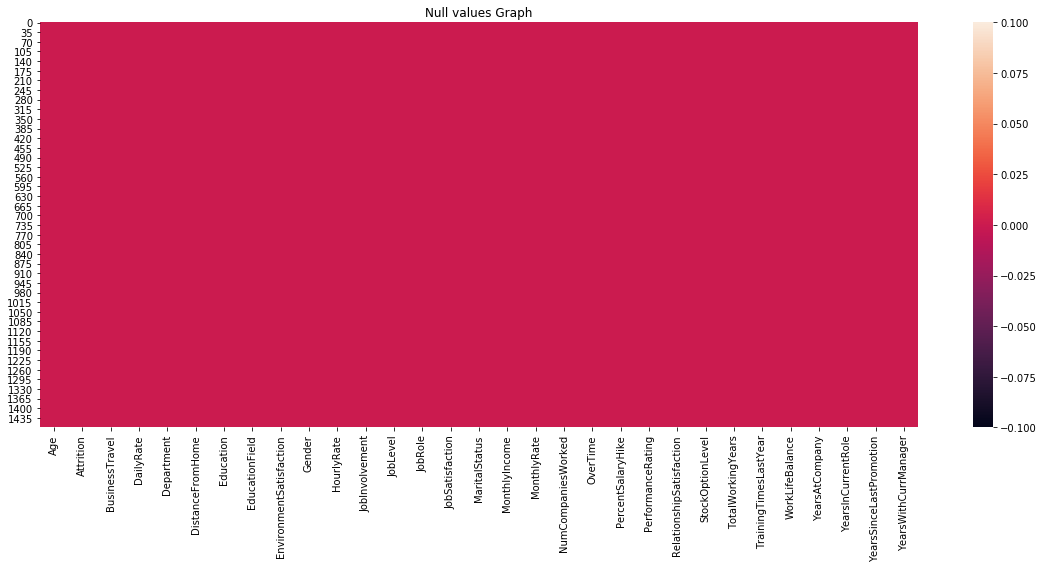

In [11]:
### let's plot it see it visually

plt.figure(figsize=(16,8))
sns.heatmap(data.isna())
plt.title("Null values Graph")
plt.tight_layout()

### From the heatmap graph we can see that all red and this means there no NAN values visually..

In [12]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### I can see that h have not null values as well...

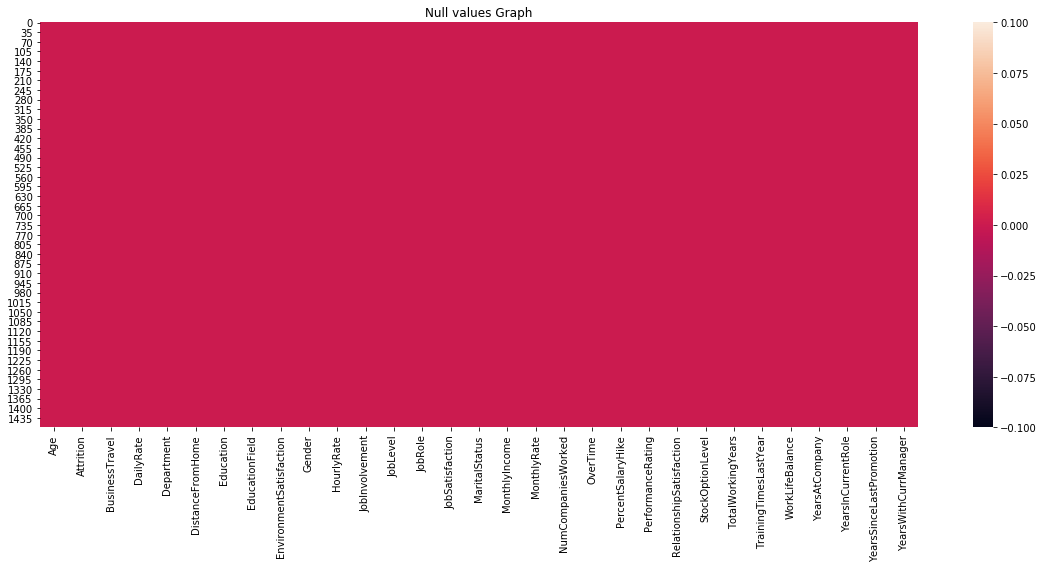

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isnull())
plt.title("Null values Graph")
plt.tight_layout()

#### From the heatmap graph we can see that all red and this means there no null values visually.

In [14]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### From the describe() method we can see ,how the data is distributed in each column.we can see also the count, the mean,the standar deviation of each column and also the the minimum and the maximum and the quantitles of each column. for the numerical columns.

#### *********************************************

### Now we I will do some __Encoder__ since some columns have text data.

## first let's seperate our data into numerical data and non-numercial data.

In [15]:
### Find non-numerical data 

non_num_data = data.drop(data.describe().columns,axis=1)
non_num_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [16]:
non_num_data.shape

(1470, 8)

#### For non-numerical data we have 8 columns.

In [17]:
### finding numerical data 
num_data = data.drop(non_num_data,axis=1)
num_data.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0


In [18]:
num_data.shape

(1470, 23)

#### For numerical data we have 23 columns...

In [19]:
for column in non_num_data.columns:
    print(non_num_data[column].value_counts())
    print('***'*20)

No     1233
Yes     237
Name: Attrition, dtype: int64
************************************************************
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
************************************************************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
************************************************************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
************************************************************
Male      882
Female    588
Name: Gender, dtype: int64
************************************************************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager 

### let's divide our non_num_data into two scalable and unscalable data 

#### unscalable data  "Attrition","Gender","OverTime","MaritalStatus"

In [20]:
scalable_data = non_num_data.drop(["Attrition","Gender","OverTime","MaritalStatus"],axis=1)

In [21]:
scalable_data.head(2)

,BusinessTravel,Department,EducationField,JobRole
0,Travel_Rarely,Sales,Life Sciences,Sales Executive
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist


In [22]:
unscalable_data = non_num_data.drop(scalable_data,axis=1)
unscalable_data.head(2)

,Attrition,Gender,MaritalStatus,OverTime
0,Yes,Female,Single,Yes
1,No,Male,Married,No


### unscalable_data I will Encoder them using LabelEncoder() because they are  __unscalable or unmeasurable data.__

In [23]:
## import the libraries
from sklearn.preprocessing import LabelEncoder

In [24]:
unscalable_data = unscalable_data.apply(LabelEncoder().fit_transform)

In [25]:
## verification
unscalable_data.head(5)

,Attrition,Gender,MaritalStatus,OverTime
0,1,0,2,1
1,0,1,1,0
2,1,1,2,1
3,0,0,1,1
4,0,1,1,0


### For  scalable_data those which have ordered categorical measurable like (first, second ,third ,...) I will used OrdinalEncoder to encoder them.

In [26]:

from sklearn.preprocessing import OrdinalEncoder

In [27]:
scalable_data.head(2)

,BusinessTravel,Department,EducationField,JobRole
0,Travel_Rarely,Sales,Life Sciences,Sales Executive
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist


In [28]:
## here I am ordering the categorical in ascending order in ordinalencoder
## and encoder all at time

ord_enc = OrdinalEncoder(categories= [['Non-Travel','Travel_Rarely','Travel_Frequently'],
                                     ['Research & Development','Sales','Human Resources'],
                    ['Life Sciences','Other','Medical','Marketing','Technical Degree','Human Resources'],
                                      
                     ['Healthcare Representative','Research Director',\
                      'Sales Executive','Sales Representative',\
                      'Research Scientist','Laboratory Technician',\
                      'Manufacturing Director','Manager','Human Resources']
                                     ])

In [29]:
df_encoded = ord_enc.fit_transform(scalable_data[["BusinessTravel",
                                                  "Department",
                                                  "EducationField",
                                                  "JobRole"]])

In [30]:
df_encoded

array([[1., 1., 0., 2.],
       [2., 0., 0., 4.],
       [1., 0., 1., 5.],
       ...,
       [1., 0., 0., 6.],
       [2., 1., 2., 2.],
       [1., 0., 2., 5.]])

In [31]:
scalable_data[["BusinessTravel","Department","EducationField","JobRole"]] = df_encoded

In [32]:
## Verification 
scalable_data.head(5)

,BusinessTravel,Department,EducationField,JobRole
0,1.0,1.0,0.0,2.0
1,2.0,0.0,0.0,4.0
2,1.0,0.0,1.0,5.0
3,2.0,0.0,0.0,4.0
4,1.0,0.0,2.0,5.0


### now let's concatinate the both sub dataframe scalable_data and unscalable_data

In [33]:
single_data = pd.concat([scalable_data,unscalable_data],axis=1)

In [34]:
single_data.shape

(1470, 8)

In [35]:
single_data.head()

,BusinessTravel,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,1.0,1.0,0.0,2.0,1,0,2,1
1,2.0,0.0,0.0,4.0,0,1,1,0
2,1.0,0.0,1.0,5.0,1,1,2,1
3,2.0,0.0,0.0,4.0,0,0,1,1
4,1.0,0.0,2.0,5.0,0,1,1,0


### again let's concatinate this sigle_data with the numerical data (num_data)

In [36]:
new_data = pd.concat([num_data,single_data], axis=1)

### Let's saved our cleaned data. 

In [37]:
new_data.to_csv('clean_data.csv',index=False)

In [38]:
print('***'*30)
print('***'*30)

******************************************************************************************
******************************************************************************************


## Now we have our new_data and it is  cleaned.

In [39]:
new_data.shape

(1470, 31)

In [40]:
new_data.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1.0,1.0,0.0,2.0,1,0,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,2.0,0.0,0.0,4.0,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1.0,0.0,1.0,5.0,1,1,2,1


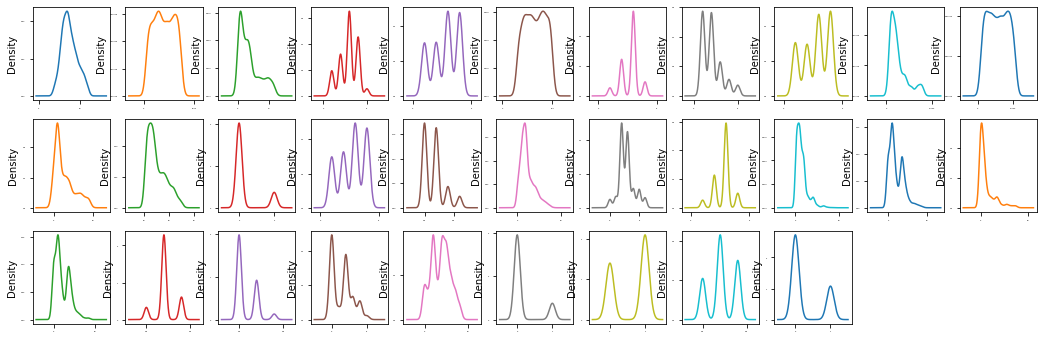

In [41]:
new_data.plot(kind='density',subplots=True,
          layout=(6,11),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

#### From this density graph we can see that most the columns in the dataset have normal distribution format and some not .

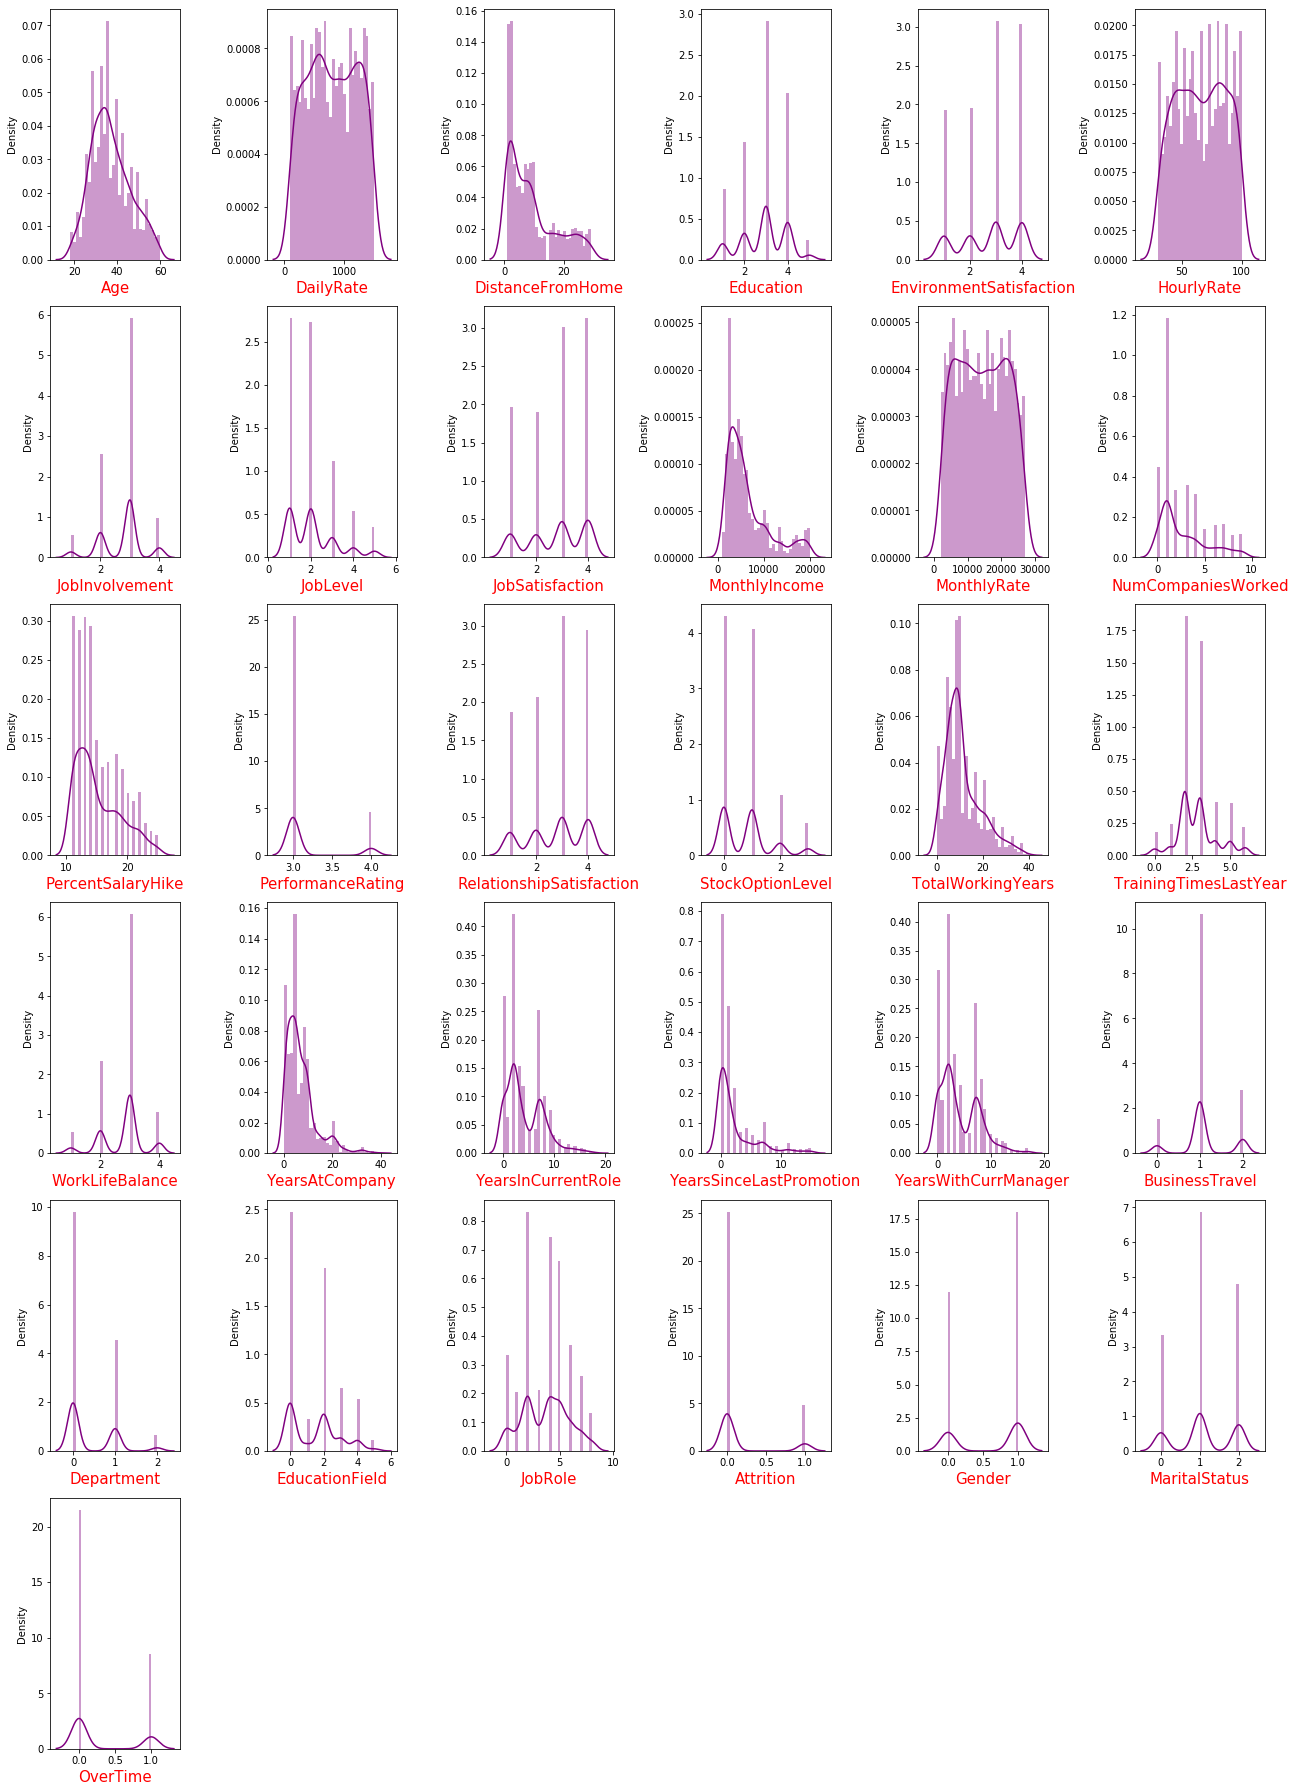

In [42]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in new_data:
    if plotnumber <= 31:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(new_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

#### From distplot we can see that our data is not distributed normally for most the columns since we can see a lot of  skewness..

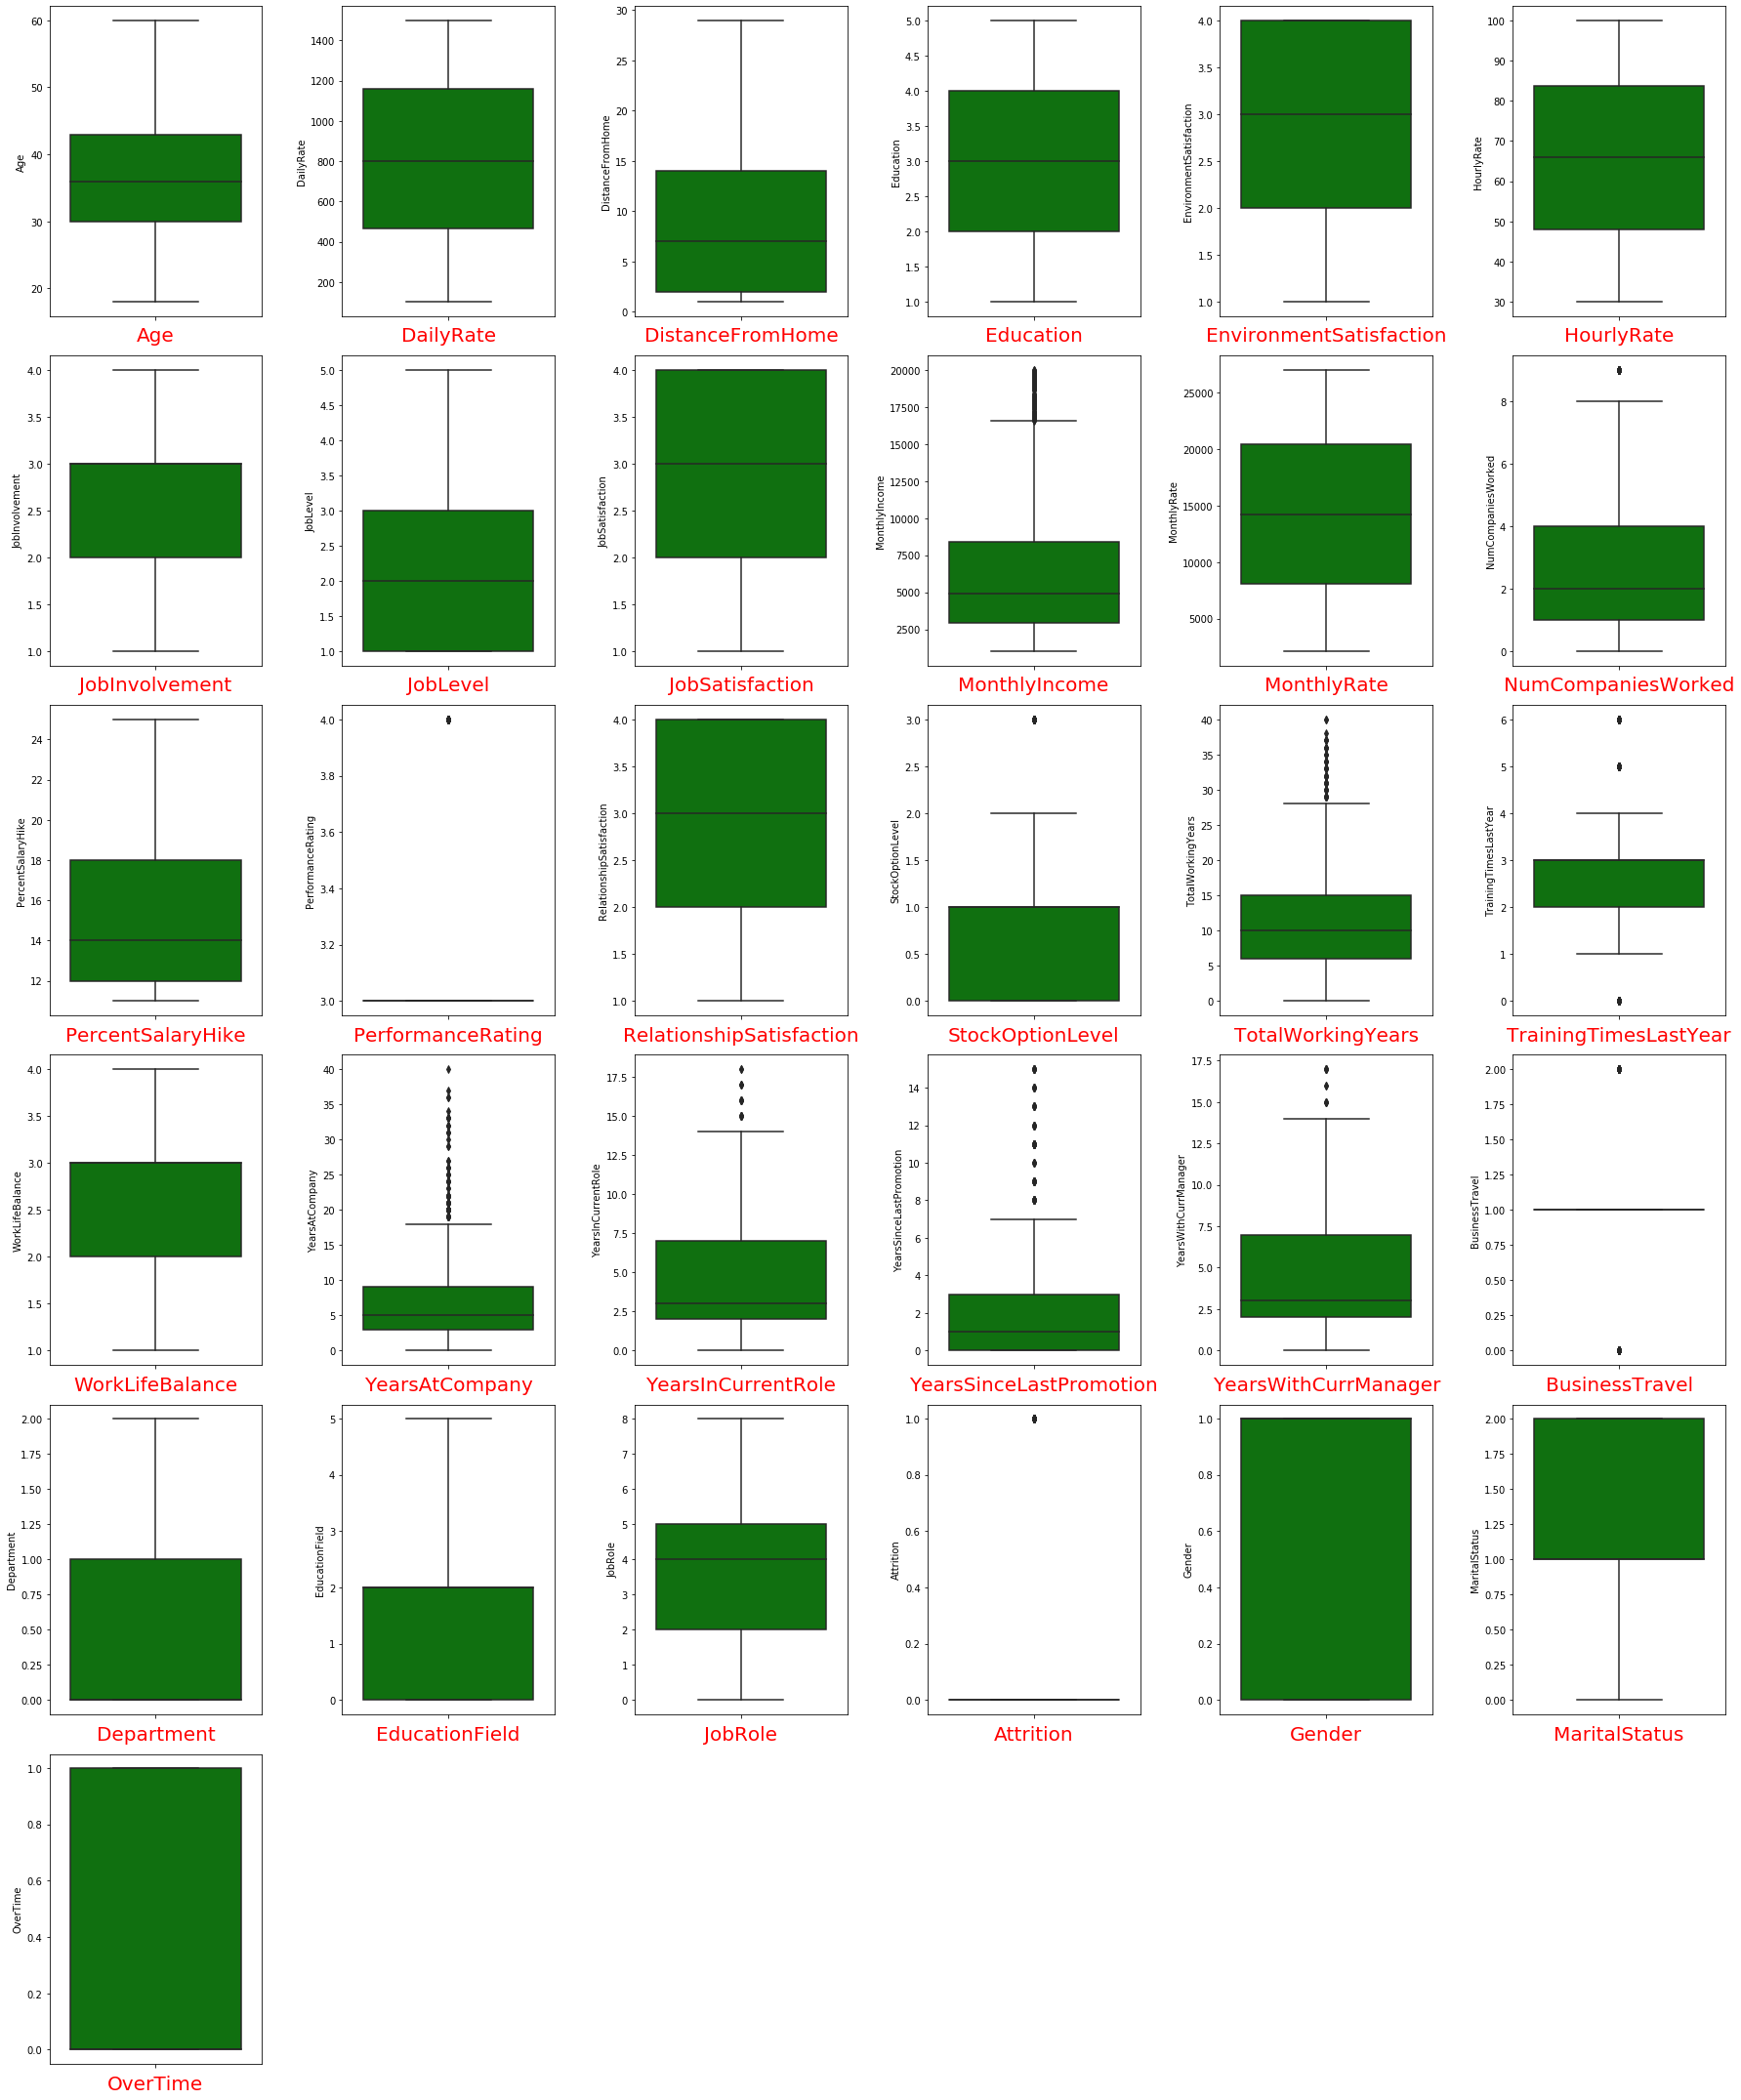

In [43]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in new_data:
    if plotnumber <= 31:
        ax = plt.subplot(6,6,plotnumber)
        sns.boxplot(y= new_data[column],color='green',orient='h')
        plt.xlabel(column,fontsize = 20,color='red')
    plotnumber+=1
plt.tight_layout()

#### From the above boxplot graph we can see outliers in some columns like and also some columns have 
#### catogorical data but the unbalance is too large like (BusinessTravel,Attrition,PerformanceRating) . so let's sovle it first.

In [44]:
new_data.BusinessTravel.value_counts()


1.0    1043
2.0     277
0.0     150
Name: BusinessTravel, dtype: int64

In [45]:
new_data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [46]:
new_data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

### For our  target varibale "Attrition", we will solve the problem of unbalance  and for other two column , I will drop them.(BusinessTravel.value_counts,PerformanceRating)

In [47]:
new_data.drop(["BusinessTravel","PerformanceRating"],axis=1, inplace=True)

In [48]:
new_data.shape

(1470, 29)

### Now our new_data has 29 columns.

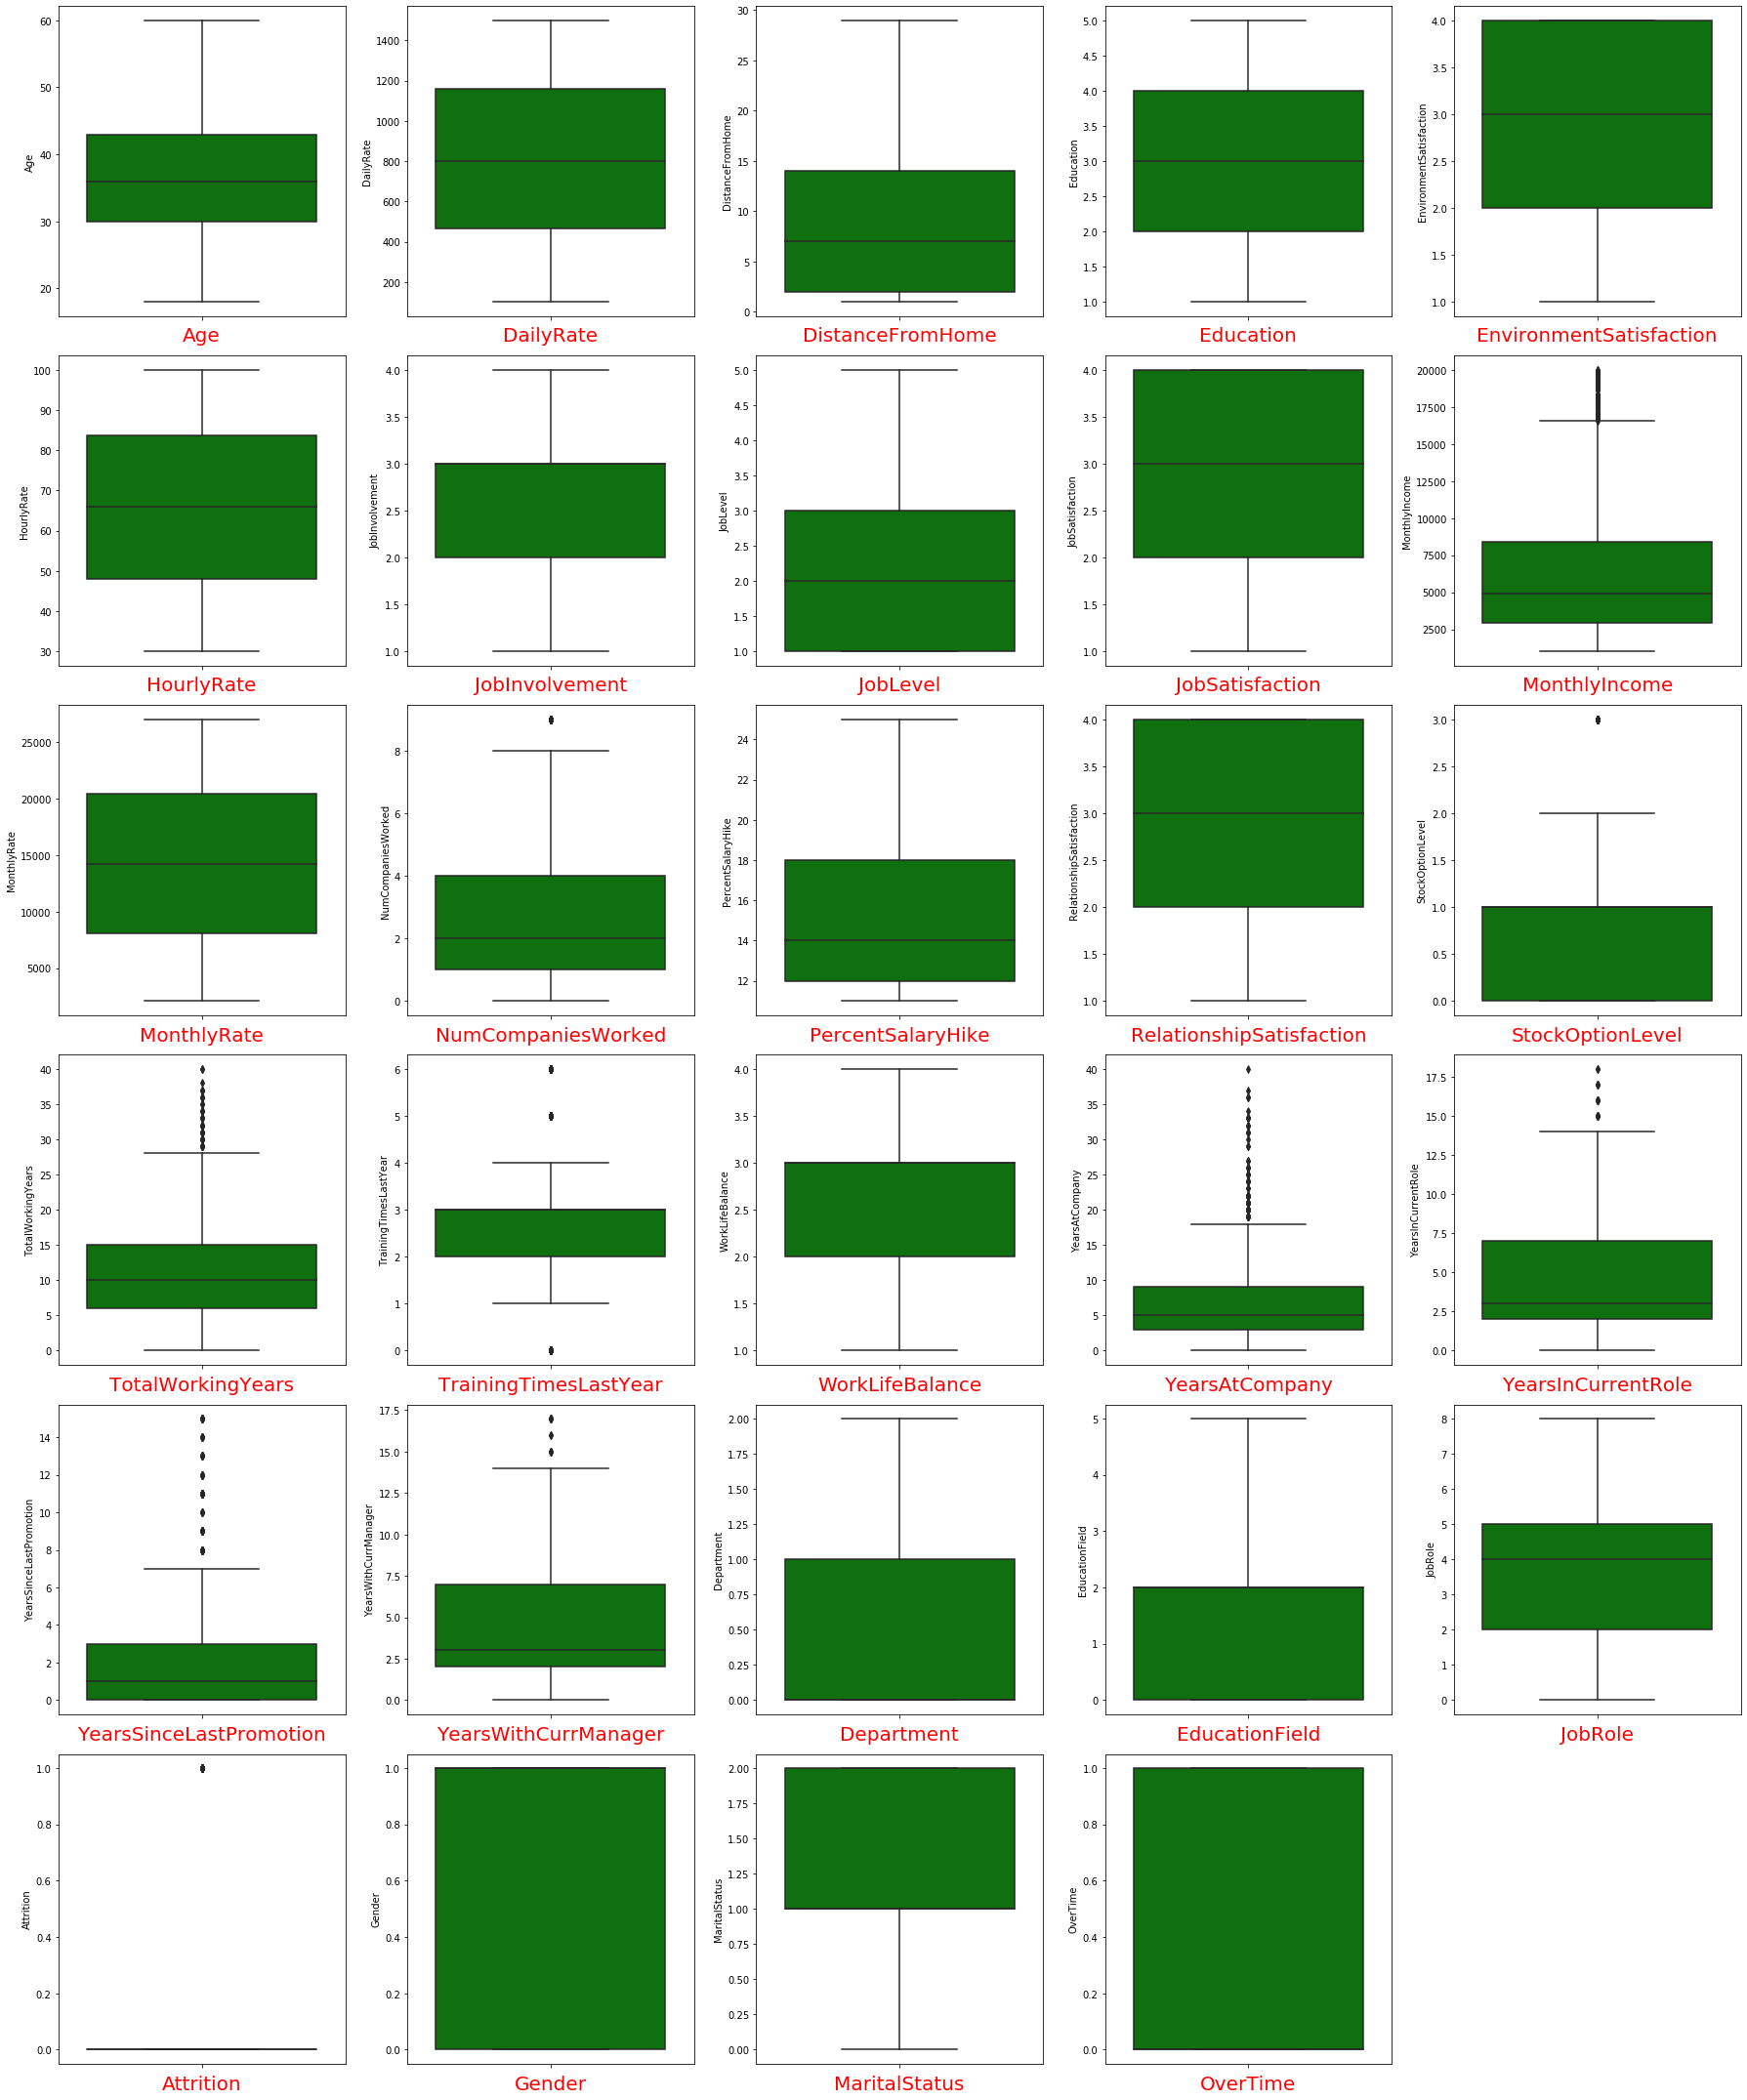

In [49]:
### let's plot again boxplot graph

plt.figure(figsize=(25,30))
plotnumber = 1

for column in new_data:
    if plotnumber <= 29:
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(y= new_data[column],color='green',orient='h')
        plt.xlabel(column,fontsize = 20,color='red')
    plotnumber+=1
plt.tight_layout()

### Let's remove the ourliers from from  columns those have continuous data.

In [50]:
## Importing the libraries
from scipy.stats import zscore

In [51]:
z = np.abs(zscore(new_data))

In [52]:
X_data = new_data[(z<3).all(axis =1)]

In [53]:
X_data.shape

(1387, 29)

#### The X_data have 1387 rows and 29 columns.

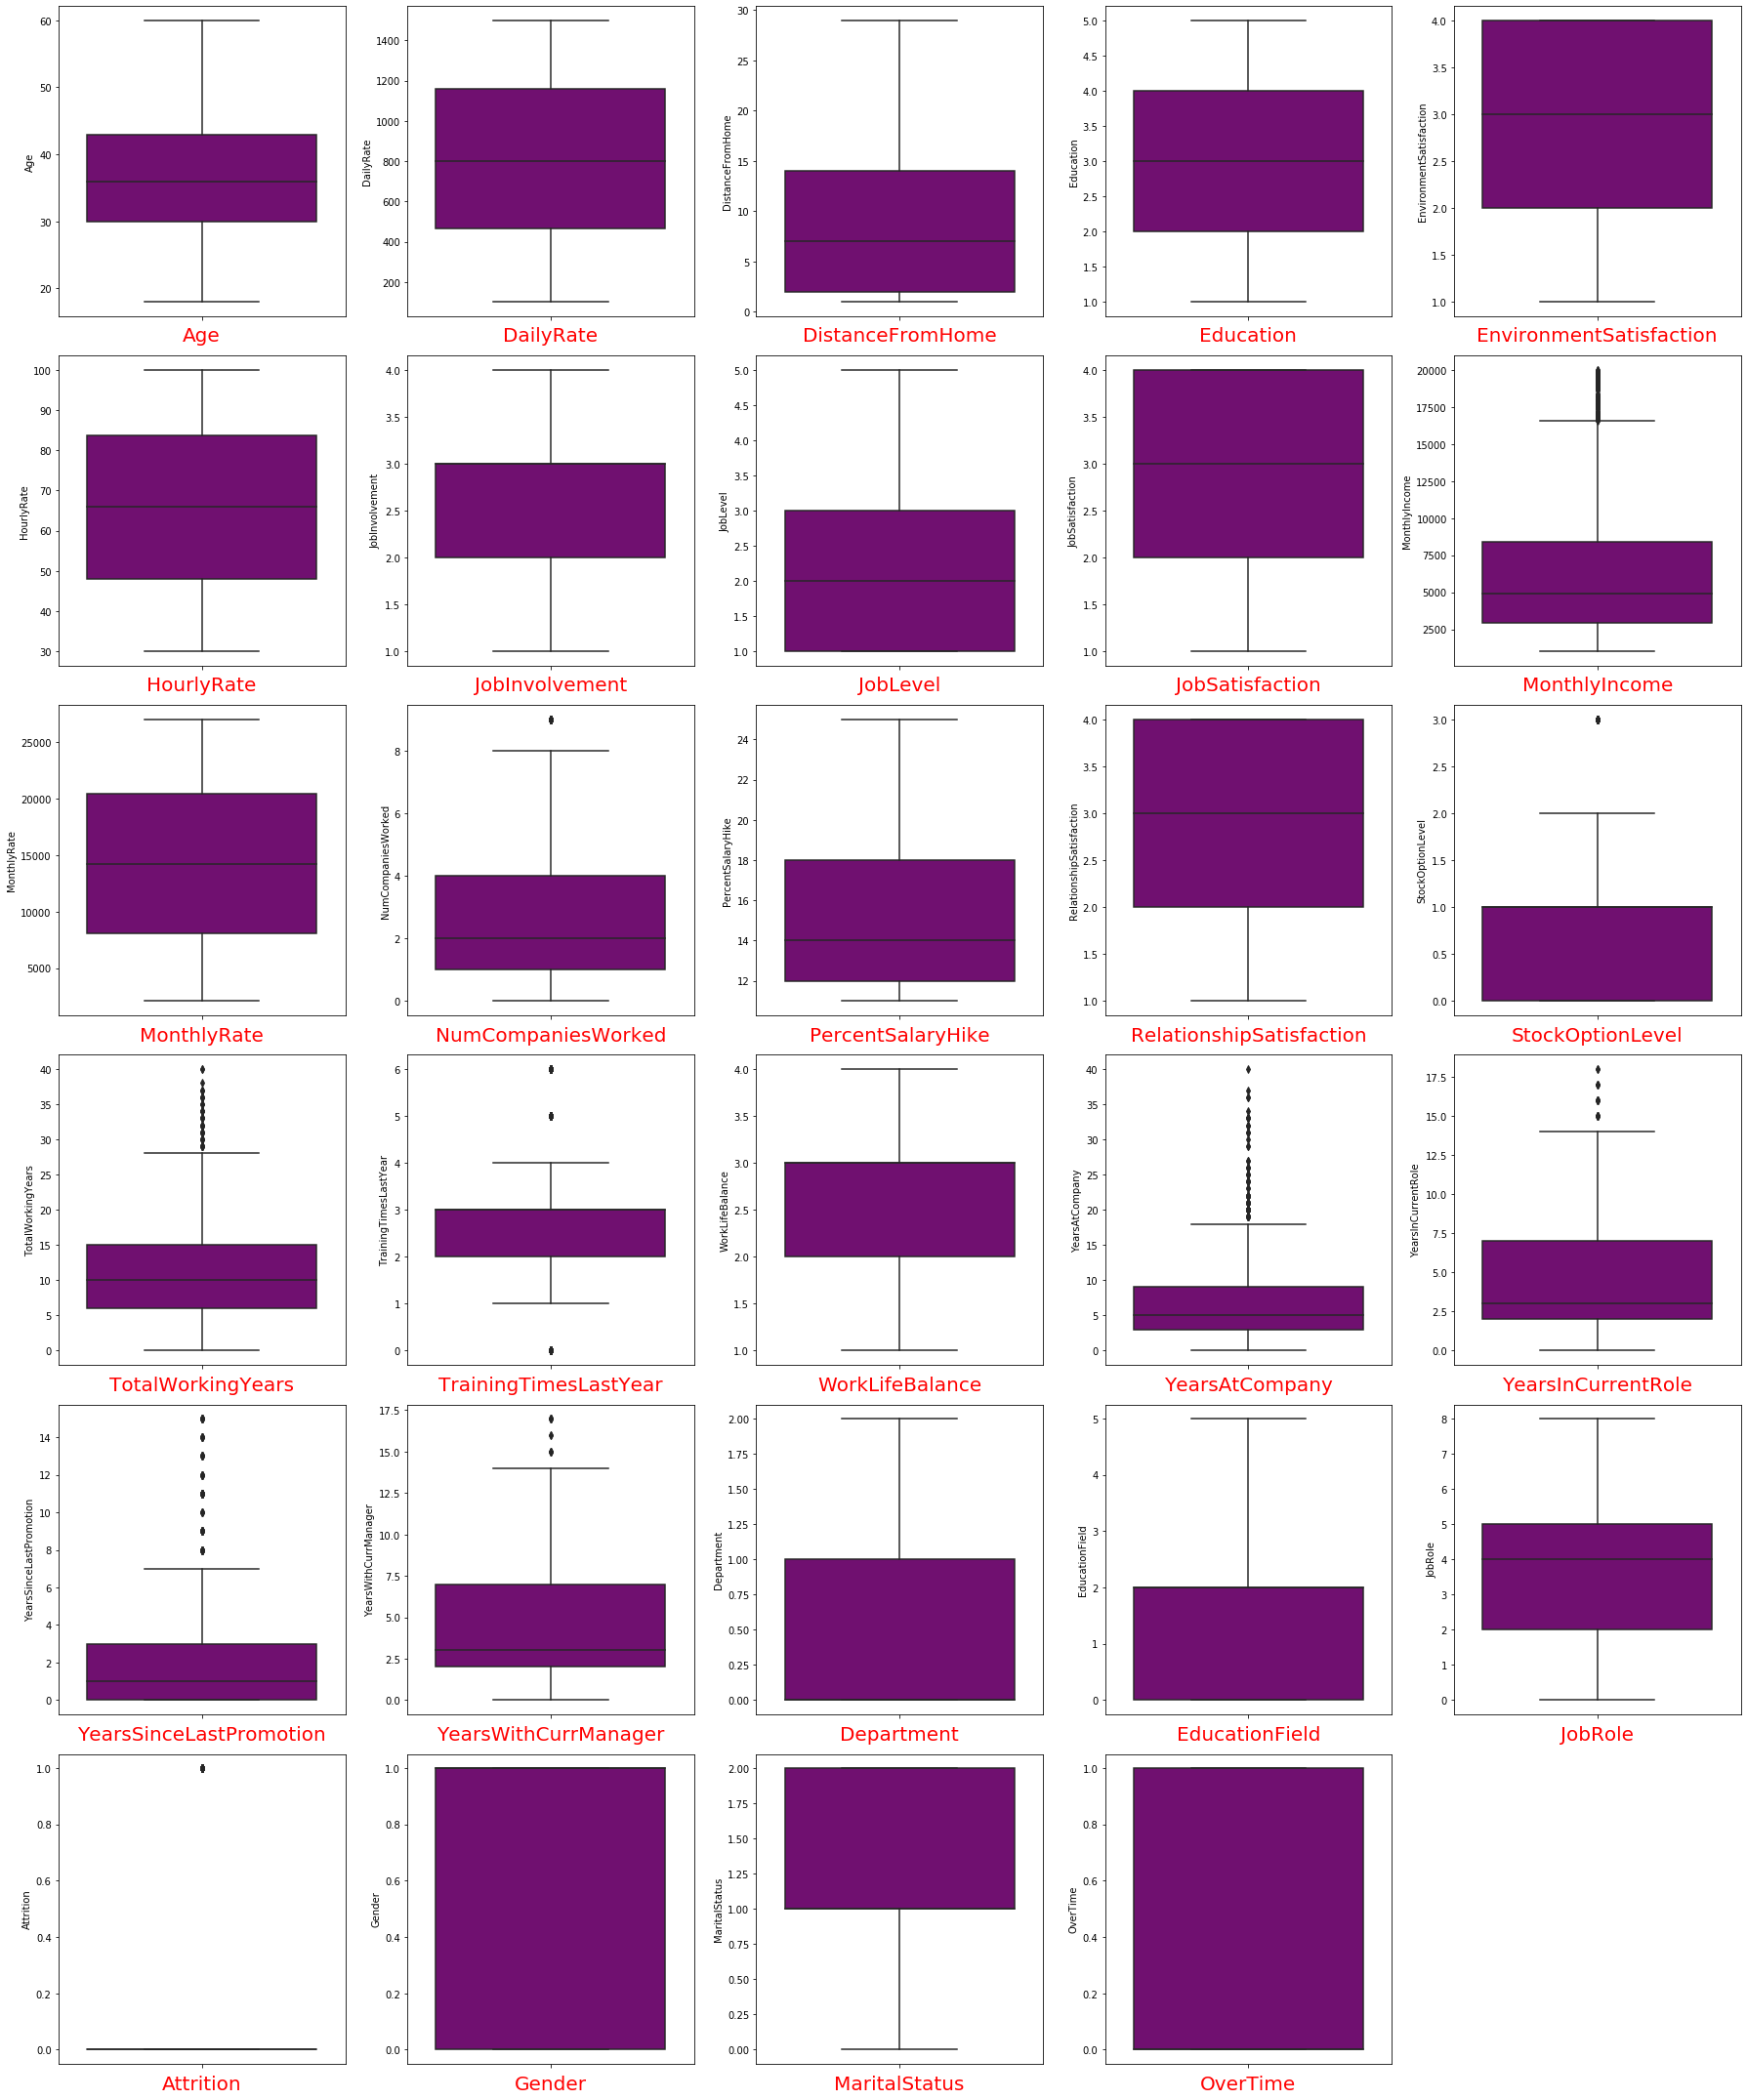

In [54]:
### Again let's check if the outliers are removed or not.

### let's plot again boxplot graph

plt.figure(figsize=(25,30))
plotnumber = 1

for column in new_data:
    if plotnumber <= 29:
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(y= new_data[column],color='purple',orient='h')
        plt.xlabel(column,fontsize = 20,color='red')
    plotnumber+=1
plt.tight_layout()

#### we can see that there are till outliers in those 7 columns: __"MonthlyIncome", "NumCompaniesWorked","StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsSinceLastPromotion", "YearsWithCurrManager".__

### Let's use the Quantiles techniques and see if we can remove them..

#### Outlier Dectection Formula
#### Higher side ===> Q3 + (1.5 * IQR)
#### lower side ===> Q1 - (1.5 * IQR)
#### IQR = Inter Quantile Rate = Q3 - Q1

#### We can see that all the outliers are from the high side ,that means after above maximum. From the above boxplot..

In [55]:
## Find the IQR ( Inter Quantile Range) to identify outlier

# 1st quantile
q1 = X_data.quantile(0.25)

# 3rd quantile
q3 = X_data.quantile(0.75)

#IQR 
iqr = q3 - q1


In [56]:
high_MonthlyIncome = (q3.MonthlyIncome + (1.5 * iqr.MonthlyIncome))
high_MonthlyIncome

14041.25

#### This means from the column MonthlyIncome all the records values greater than 14041.25 (MonthlyIncome > 14041.25) are Outliers.

In [57]:
## the get indexes of those records

indexes = np.where(X_data['MonthlyIncome'] > high_MonthlyIncome)
indexes

(array([  18,   25,   28,   60,   98,   99,  104,  111,  137,  154,  174,
         180,  217,  219,  227,  240,  246,  261,  262,  271,  281,  295,
         309,  328,  359,  369,  371,  379,  386,  394,  401,  404,  429,
         460,  463,  468,  505,  508,  537,  556,  575,  612,  659,  669,
         673,  699,  710,  721,  725,  729,  758,  764,  768,  804,  811,
         819,  821,  848,  849,  854,  855,  857,  863,  865,  882,  890,
         899,  900,  941,  950,  951,  955,  994, 1015, 1018, 1032, 1060,
        1063, 1072, 1086, 1097, 1107, 1115, 1124, 1125, 1153, 1191, 1204,
        1234, 1253, 1294, 1297, 1354, 1360]),)

In [58]:
## verification
X_data['MonthlyIncome'].iloc[18]

15427

In [59]:
## Let's drop indexes from the dataset

X_data= X_data.drop(X_data.index[indexes])

In [60]:
## reset the index
X_data.reset_index(drop=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5,1.0,0.0,2.0,1,0,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,0.0,0.0,4.0,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,0.0,1.0,5.0,1,1,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,0.0,0.0,4.0,0,0,1,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,4,1,6,3,3,2,2,2,2,0.0,2.0,5.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,0,3,0.0,2.0,5.0,0,1,1,0
1289,39,613,6,1,4,42,2,3,1,9991,21457,4,15,1,1,9,5,3,7,7,1,7,0.0,2.0,0.0,0,1,1,0
1290,27,155,4,3,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,0,3,0.0,0.0,6.0,0,1,1,1
1291,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,4,0,17,3,2,9,6,0,8,1.0,2.0,2.0,0,1,1,0


In [61]:
## "NumCompaniesWorked",column

indexes = np.where(X_data["NumCompaniesWorked"] > (q3.NumCompaniesWorked + (1.5 * iqr.NumCompaniesWorked)))
X_data= X_data.drop(X_data.index[indexes])
X_data.reset_index(drop=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5,1.0,0.0,2.0,1,0,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,0.0,0.0,4.0,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,0.0,1.0,5.0,1,1,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,0.0,0.0,4.0,0,0,1,1
4,32,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,0,8,2,2,7,7,3,6,0.0,0.0,5.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,0,3,0.0,2.0,5.0,0,1,1,0
1243,39,613,6,1,4,42,2,3,1,9991,21457,4,15,1,1,9,5,3,7,7,1,7,0.0,2.0,0.0,0,1,1,0
1244,27,155,4,3,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,0,3,0.0,0.0,6.0,0,1,1,1
1245,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,4,0,17,3,2,9,6,0,8,1.0,2.0,2.0,0,1,1,0


In [62]:
## "StockOptionLevel",column

indexes = np.where(X_data["StockOptionLevel"] > (q3.StockOptionLevel + (1.5 * iqr.StockOptionLevel)))
X_data= X_data.drop(X_data.index[indexes])
X_data.reset_index(drop=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5,1.0,0.0,2.0,1,0,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,0.0,0.0,4.0,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,0.0,1.0,5.0,1,1,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,0.0,0.0,4.0,0,0,1,1
4,32,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,0,8,2,2,7,7,3,6,0.0,0.0,5.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,0,3,0.0,2.0,5.0,0,1,1,0
1170,39,613,6,1,4,42,2,3,1,9991,21457,4,15,1,1,9,5,3,7,7,1,7,0.0,2.0,0.0,0,1,1,0
1171,27,155,4,3,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,0,3,0.0,0.0,6.0,0,1,1,1
1172,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,4,0,17,3,2,9,6,0,8,1.0,2.0,2.0,0,1,1,0


In [63]:
indexes = np.where(X_data["TotalWorkingYears"] > (q3.TotalWorkingYears + (1.5 * iqr.TotalWorkingYears)))
X_data= X_data.drop(X_data.index[indexes])
X_data.reset_index(drop=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5,1.0,0.0,2.0,1,0,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,0.0,0.0,4.0,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,0.0,1.0,5.0,1,1,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,0.0,0.0,4.0,0,0,1,1
4,32,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,0,8,2,2,7,7,3,6,0.0,0.0,5.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,0,3,0.0,2.0,5.0,0,1,1,0
1146,39,613,6,1,4,42,2,3,1,9991,21457,4,15,1,1,9,5,3,7,7,1,7,0.0,2.0,0.0,0,1,1,0
1147,27,155,4,3,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,0,3,0.0,0.0,6.0,0,1,1,1
1148,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,4,0,17,3,2,9,6,0,8,1.0,2.0,2.0,0,1,1,0


In [64]:
indexes = np.where(X_data["TrainingTimesLastYear"] > (q3.TrainingTimesLastYear + (1.5 * iqr.TrainingTimesLastYear)))
X_data= X_data.drop(X_data.index[indexes])
X_data.reset_index(drop=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5,1.0,0.0,2.0,1,0,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,0.0,0.0,4.0,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,0.0,1.0,5.0,1,1,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,0.0,0.0,4.0,0,0,1,1
4,32,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,0,8,2,2,7,7,3,6,0.0,0.0,5.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,26,1167,5,3,4,30,2,1,3,2966,21378,0,18,4,0,5,2,3,4,2,0,0,1.0,1.0,3.0,0,0,2,0
991,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,0,3,0.0,2.0,5.0,0,1,1,0
992,27,155,4,3,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,0,3,0.0,0.0,6.0,0,1,1,1
993,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,4,0,17,3,2,9,6,0,8,1.0,2.0,2.0,0,1,1,0


In [65]:
indexes = np.where(X_data["YearsSinceLastPromotion"] > (q3.YearsSinceLastPromotion + (1.5 * iqr.YearsSinceLastPromotion)))
X_data= X_data.drop(X_data.index[indexes])
X_data.reset_index(drop=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5,1.0,0.0,2.0,1,0,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,0.0,0.0,4.0,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,0.0,1.0,5.0,1,1,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,0.0,0.0,4.0,0,0,1,1
4,32,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,0,8,2,2,7,7,3,6,0.0,0.0,5.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,26,1167,5,3,4,30,2,1,3,2966,21378,0,18,4,0,5,2,3,4,2,0,0,1.0,1.0,3.0,0,0,2,0
880,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,0,3,0.0,2.0,5.0,0,1,1,0
881,27,155,4,3,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,0,3,0.0,0.0,6.0,0,1,1,1
882,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,4,0,17,3,2,9,6,0,8,1.0,2.0,2.0,0,1,1,0


In [66]:
indexes = np.where(X_data["YearsWithCurrManager"] > (q3.YearsWithCurrManager + (1.5 * iqr.YearsWithCurrManager)))
X_data= X_data.drop(X_data.index[indexes])
X_data.reset_index(drop=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,JobRole,Attrition,Gender,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,0,5,1.0,0.0,2.0,1,0,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,7,0.0,0.0,4.0,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,0.0,1.0,5.0,1,1,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,0.0,0.0,4.0,0,0,1,1
4,32,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,0,8,2,2,7,7,3,6,0.0,0.0,5.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,26,1167,5,3,4,30,2,1,3,2966,21378,0,18,4,0,5,2,3,4,2,0,0,1.0,1.0,3.0,0,0,2,0
880,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,0,3,0.0,2.0,5.0,0,1,1,0
881,27,155,4,3,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,0,3,0.0,0.0,6.0,0,1,1,1
882,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,4,0,17,3,2,9,6,0,8,1.0,2.0,2.0,0,1,1,0


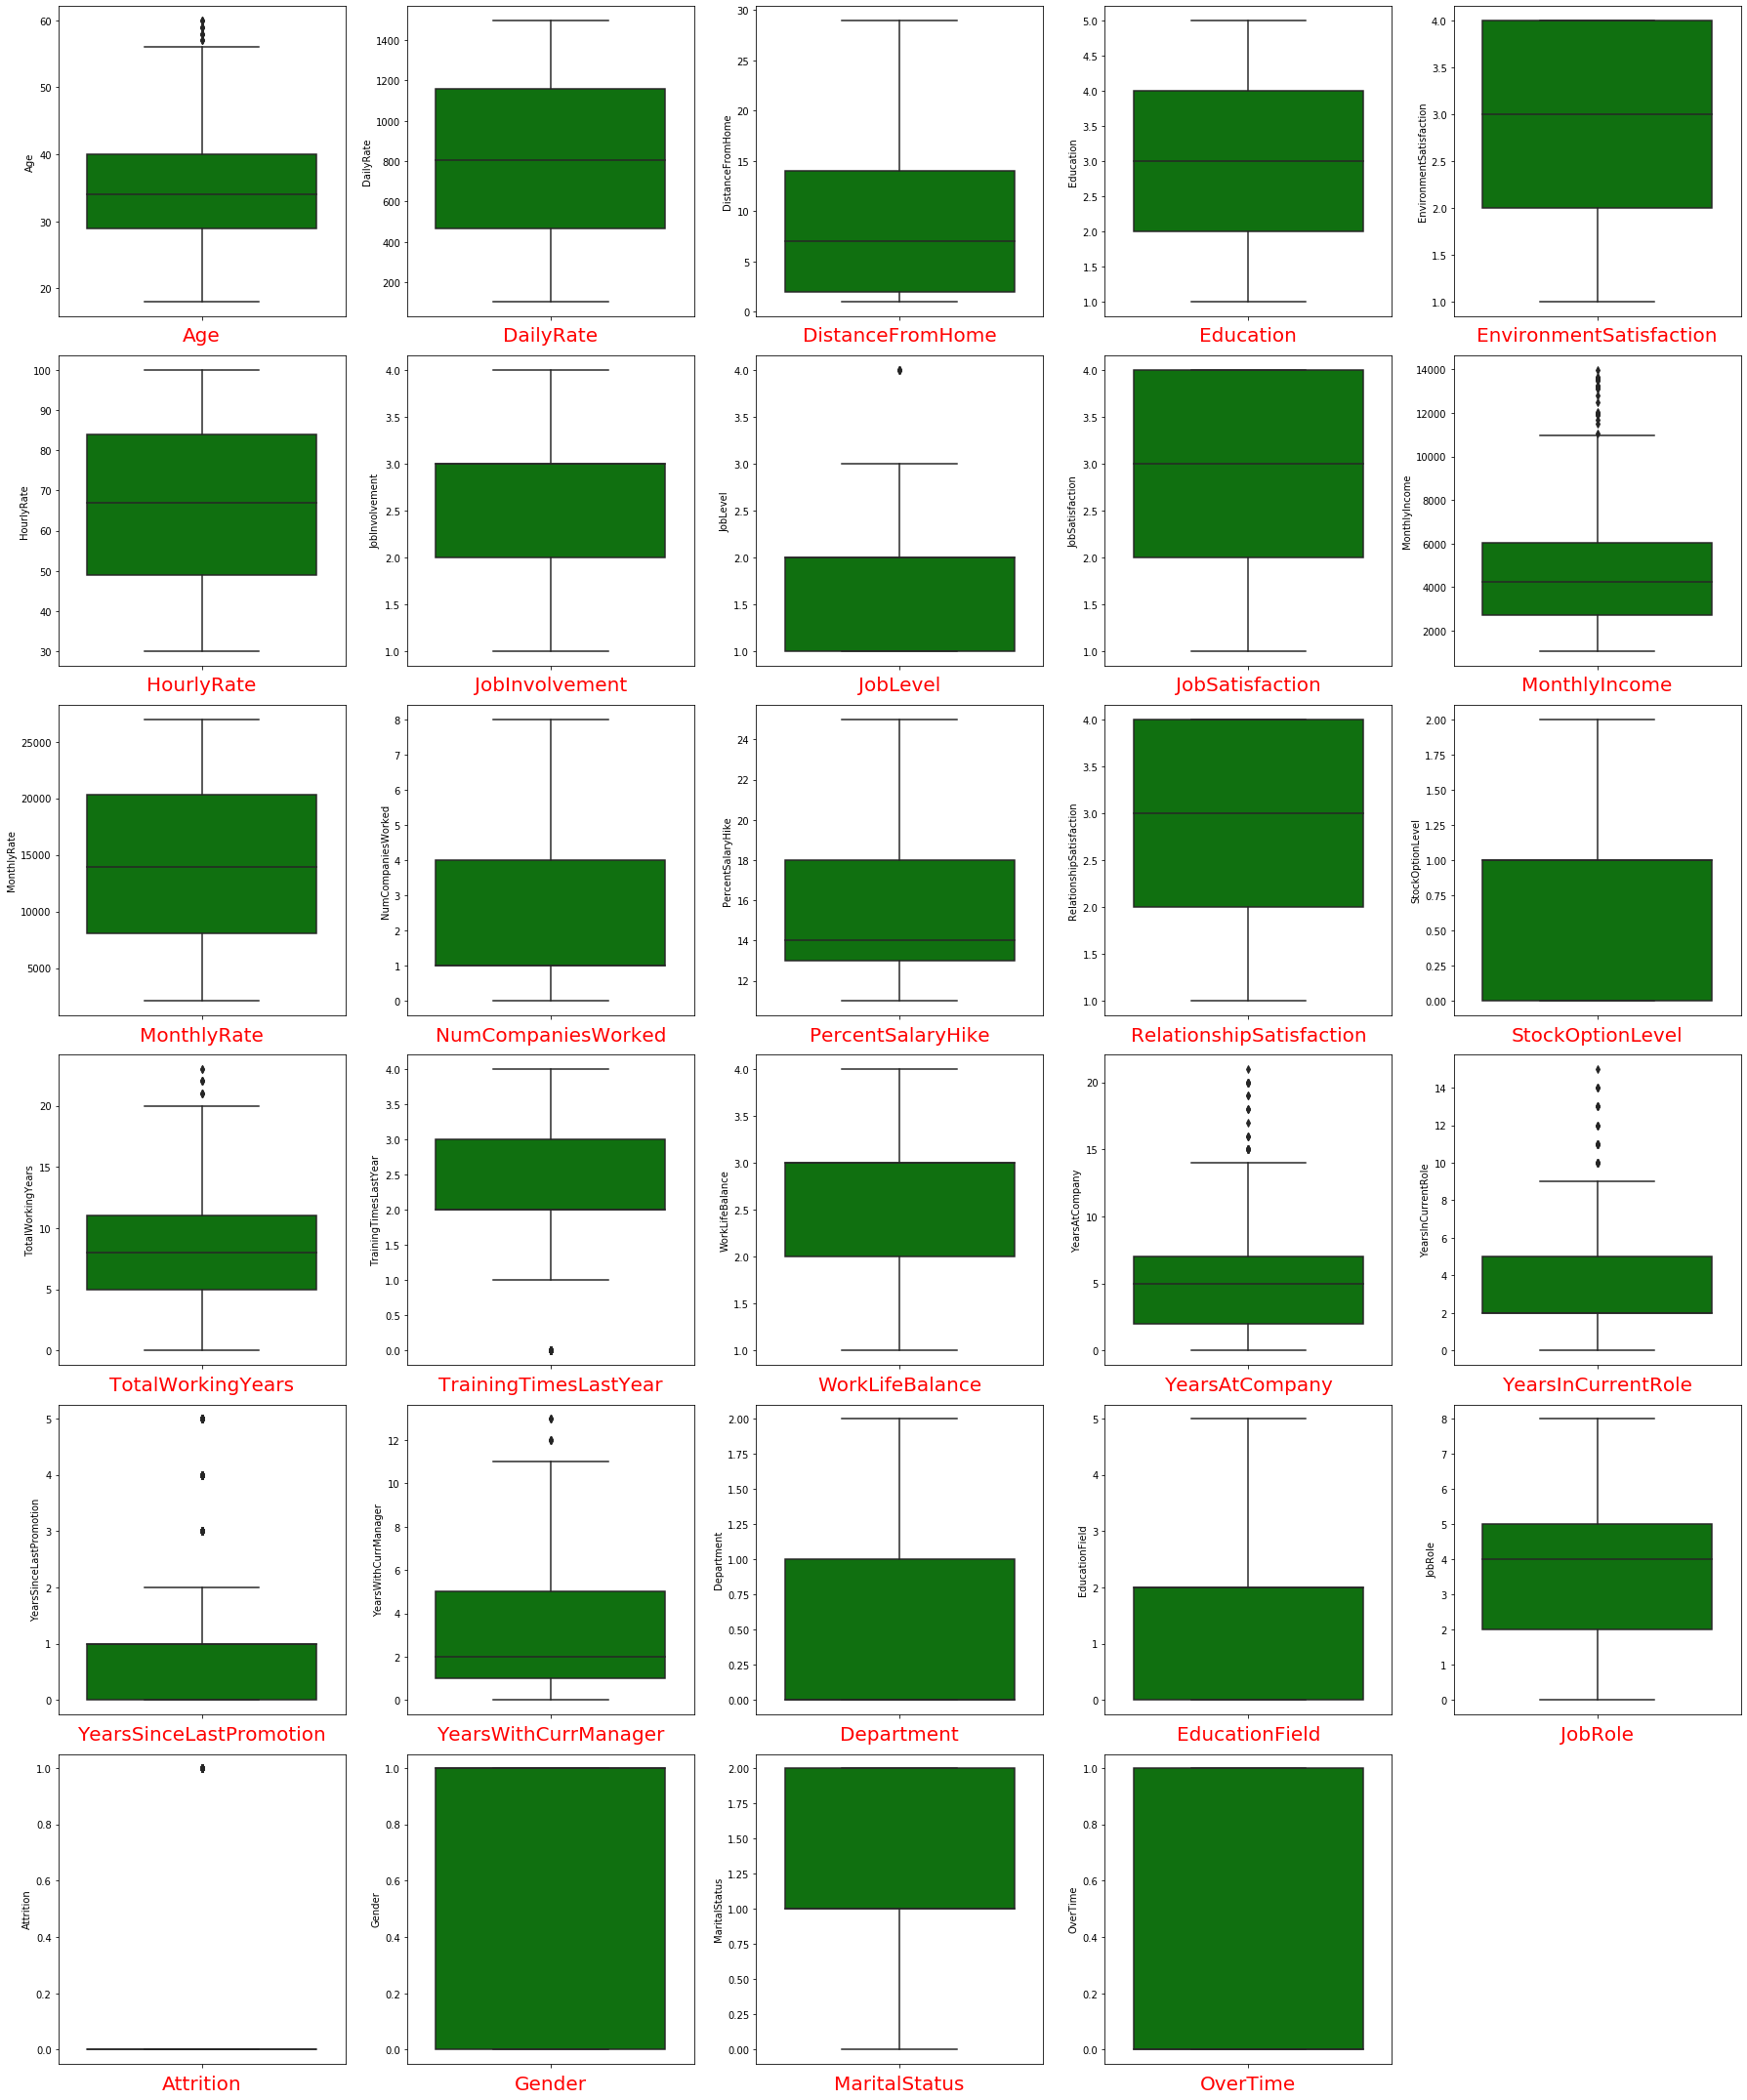

In [67]:
### Again let's check if the outliers are removed or not.

### let's plot again boxplot graph

plt.figure(figsize=(25,30))
plotnumber = 1

for column in X_data:
    if plotnumber <= 29:
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(y= X_data[column],color='green',orient='h')
        plt.xlabel(column,fontsize = 20,color='red')
    plotnumber+=1
plt.tight_layout()

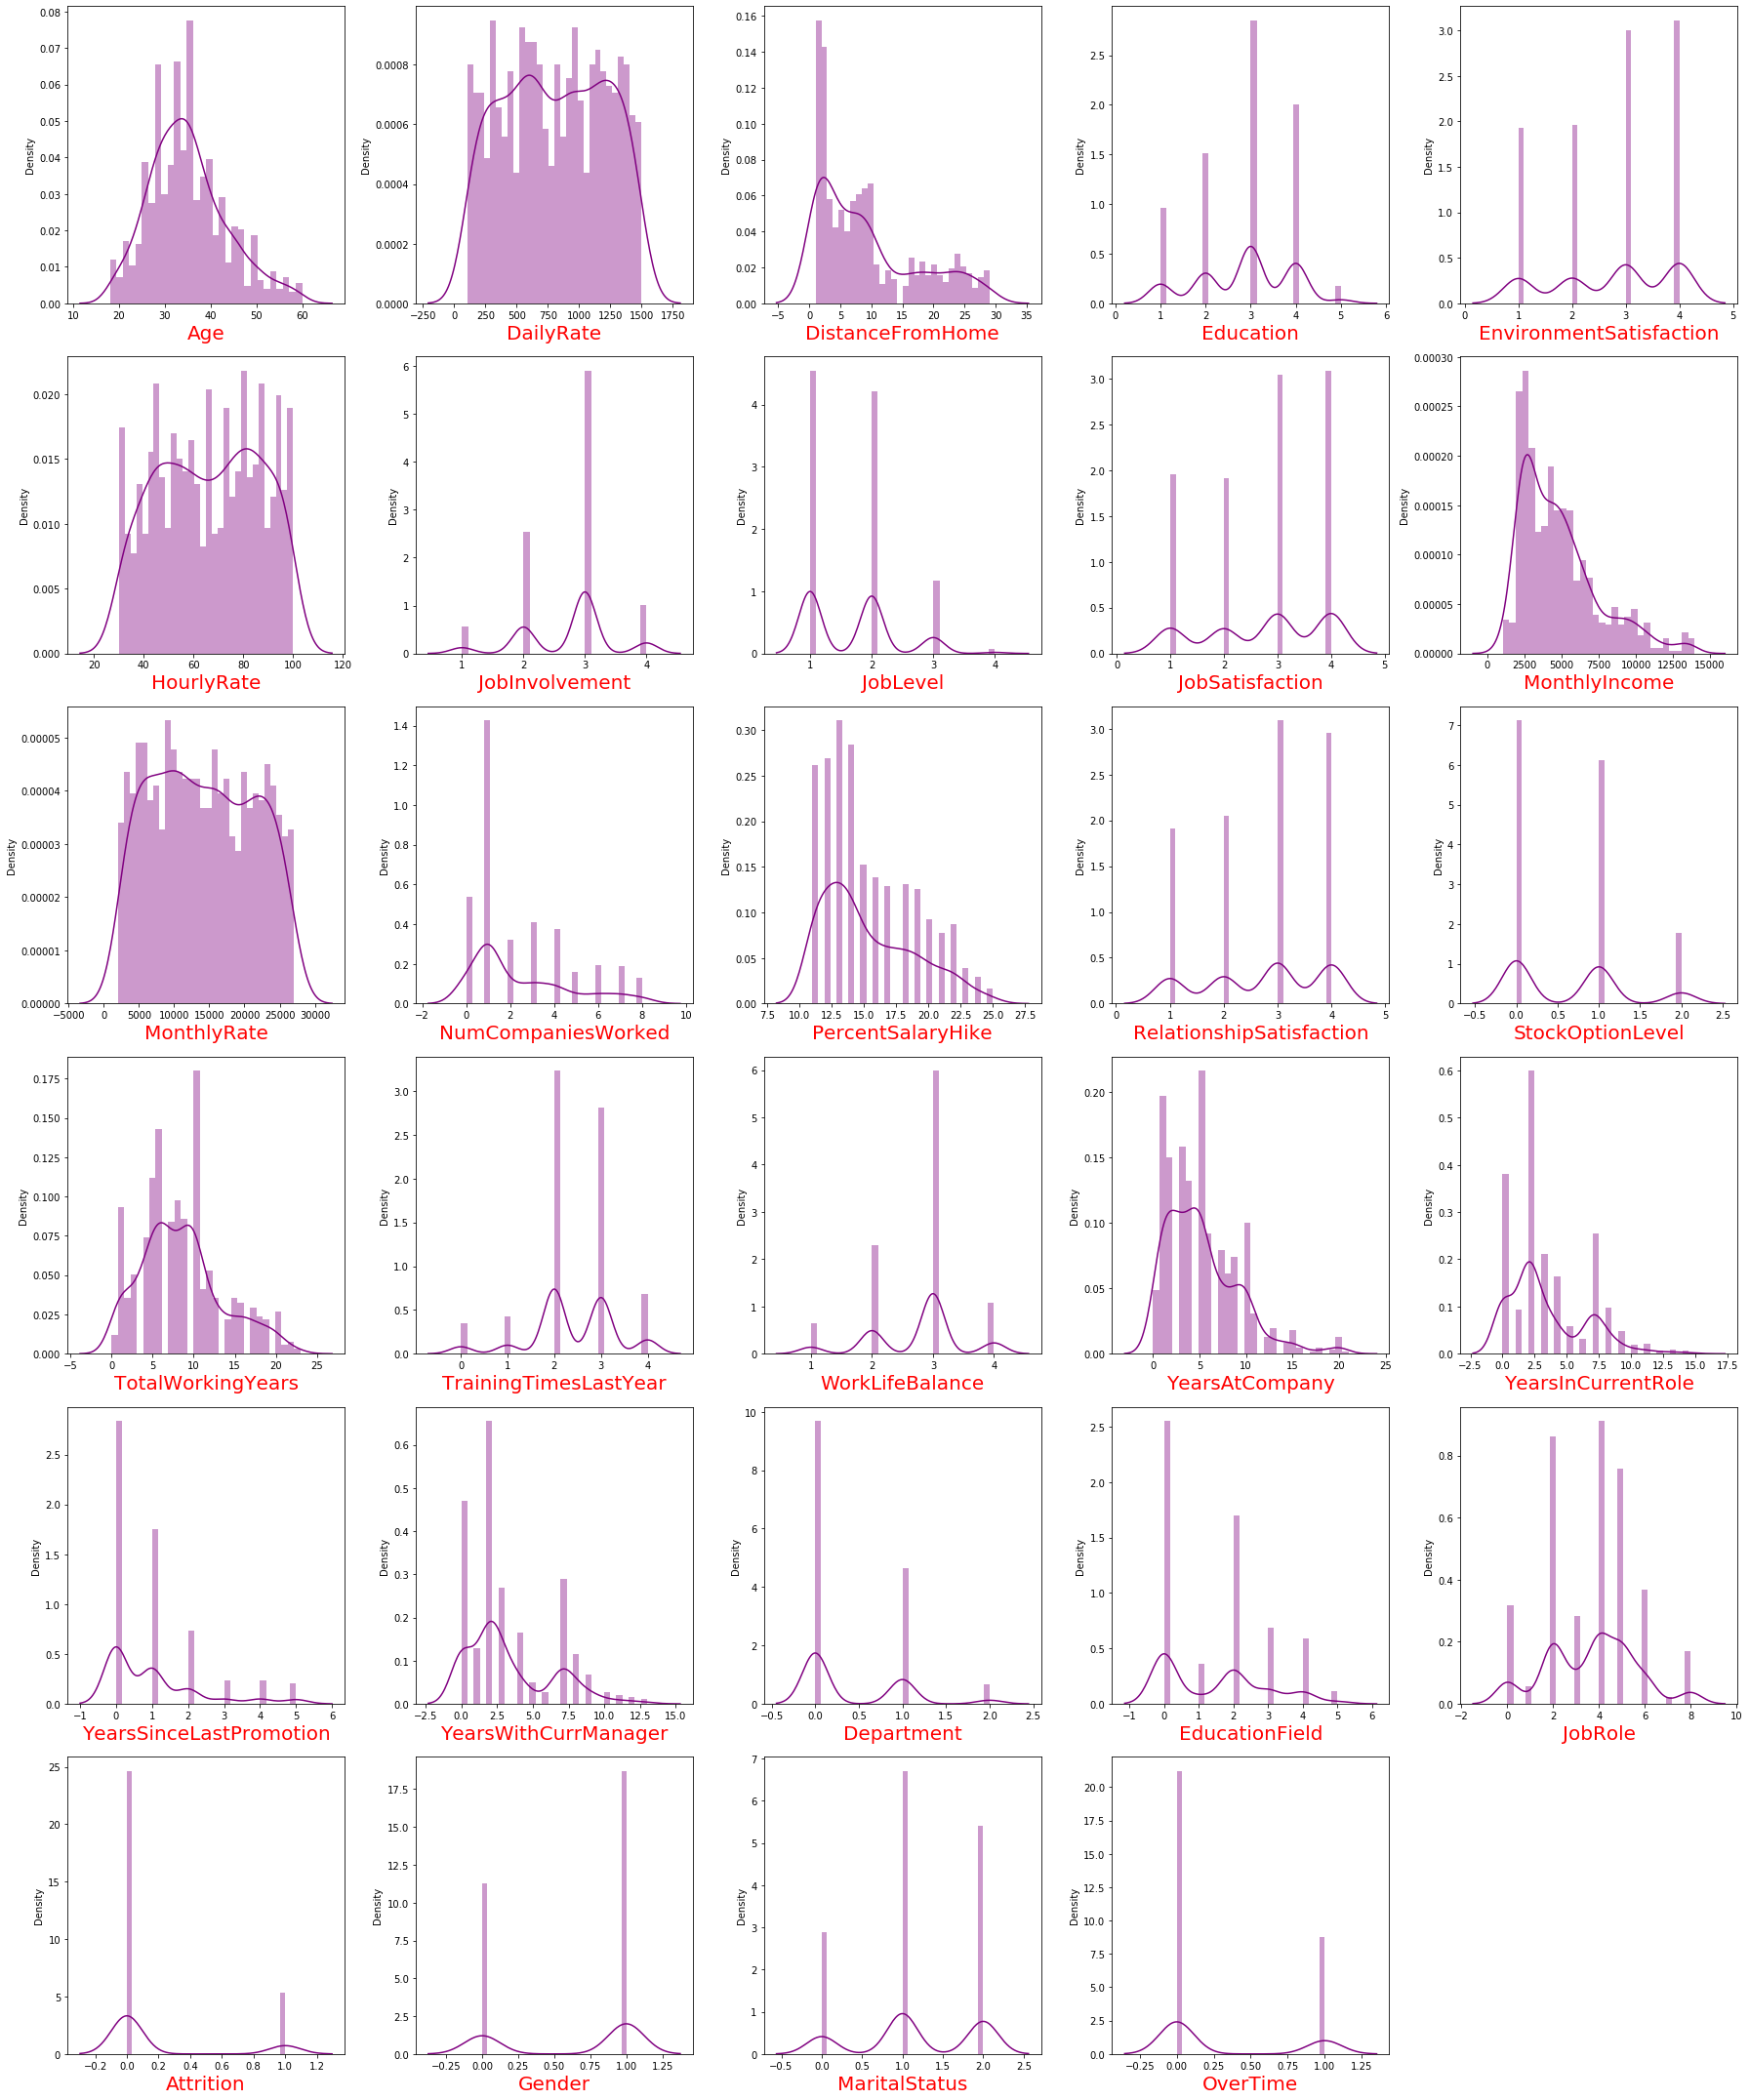

In [68]:
## plot a  distplot check the distribution

plt.figure(figsize=(25,30))
plotnumber = 1

for column in X_data:
    if plotnumber <= 29:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(X_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 20,color='red')
    plotnumber+=1
plt.tight_layout()

### From these two graph we can see that the first outliers are remove and the skewness also a remove and our data look better than before.

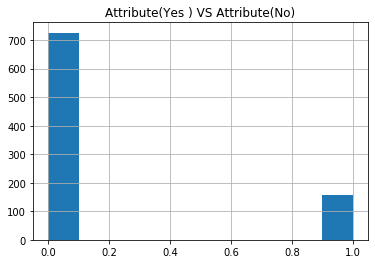

In [69]:
X_data['Attrition'].hist(grid=True)
plt.title('Attrition(Yes ) VS Attrition(No)')
plt.show()

#### From this histogram we can see that the classes are imbalance and 'Attribute( (No ) is majority and 'Attribute(Yes ) is the minority. So let's handling class imbalance using __oversampling__ the minority class.

In [70]:
## importang the libraries
from imblearn.over_sampling import SMOTE

SM = SMOTE()

In [71]:
## let's first split our dataset into label and features.

x = X_data.drop('Attrition',axis=1)
y = X_data.Attrition

In [72]:
x_over , y_over = SM.fit_resample(x, y)

In [73]:
## let's verify
y_over.value_counts()

1    726
0    726
Name: Attrition, dtype: int64

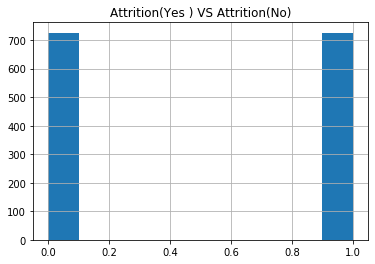

In [93]:
y_over.hist(grid=True)
plt.title('Attrition(Yes ) VS Attrition(No)')
plt.show()


#### Now we can see that our both classes of the label are balanced...

### Before fit our data to the model ,let's see by visualize the relationship bw the features and the label usig stripplot() method.

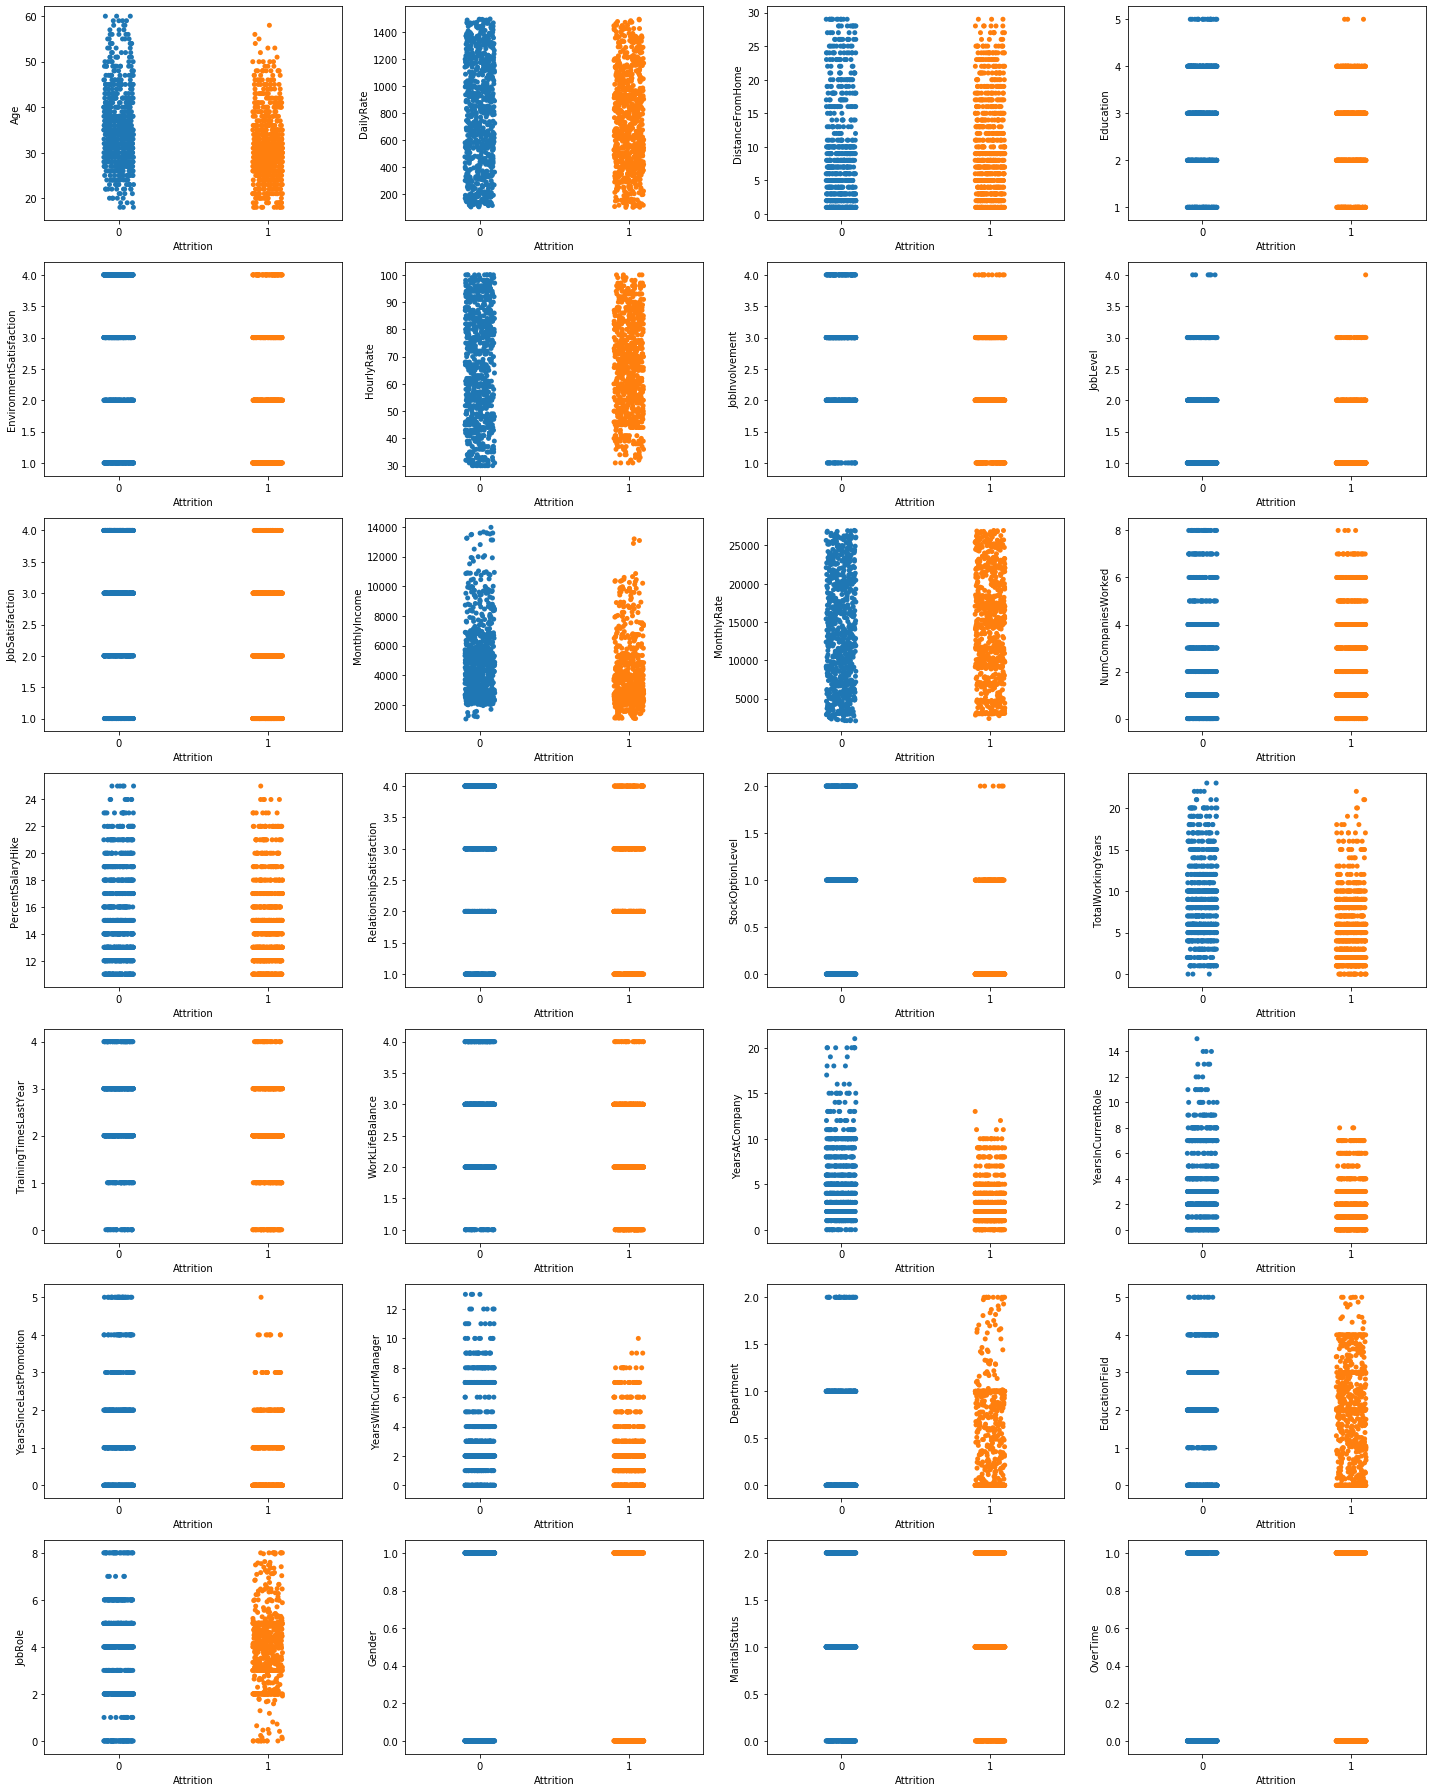

In [74]:
plt.figure(figsize=(20,25), facecolor='white')
plot_no = 1

for column in x_over:
    if plot_no <= 28:
        ax = plt.subplot(7,4,plot_no)
        sns.stripplot(y_over, x_over[column])
    plot_no+=1
plt.tight_layout()

### From the above graphs, we can say that all the features are important and they a gread relationship with our label data(target column)

### Now let's build the models.

In [75]:
### Importing the libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

## first with LogisticRegression

In [76]:
max_accu = 0
max_RS = 0
for i in range(1,400):
    x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > max_accu:
        max_accu = acc
        max_RS = i
print('Best accuracy is :',max_accu, 'on Random_state',max_RS)

Best accuracy is : 0.9 on Random_state 41


#### this code above help us to find the best random_state = 54

In [77]:
## let's build gain the model using it

x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=54)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_predlr = lr_model.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, y_predlr))
print('--'*20)
print(confusion_matrix(y_test,y_predlr))
print(classification_report(y_test,y_predlr))

The Accuracy is : 0.8666666666666667
----------------------------------------
[[ 8  1]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.95      0.86      0.90        21

    accuracy                           0.87        30
   macro avg       0.84      0.87      0.85        30
weighted avg       0.88      0.87      0.87        30



#### We built the first model using LogisticRegression Algorithum and the accuracy is : 90%

## let's build a more models select the best one....

In [78]:
## import the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Suport Vector Machine model


In [79]:
### DecisionTreeClassifier model.

dt = DecisionTreeClassifier(random_state=54)
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, pred_dt))
print('--'*20)
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_dt))
print('**'*30)
print('**'*30)

The Accuracy is : 0.8666666666666667
----------------------------------------
[[ 7  2]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.90      0.90      0.90        21

    accuracy                           0.87        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.87      0.87      0.87        30

************************************************************
************************************************************


In [80]:
## RandomForestClassifier

rf = RandomForestClassifier(54)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print("The Accuracy is :",accuracy_score(y_test, pred_rf))
print('--'*20)
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test,pred_rf))
print('**'*30)
print('**'*30)

The Accuracy is : 0.9333333333333333
----------------------------------------
[[ 9  0]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.90      0.95        21

    accuracy                           0.93        30
   macro avg       0.91      0.95      0.93        30
weighted avg       0.95      0.93      0.94        30

************************************************************
************************************************************


In [81]:
# Suport Vector Machine model( SVC )

svc = SVC(random_state=54)

svc.fit(x_train, y_train)

pred_svc = svc.predict(x_test)

print("The Accuracy is :",accuracy_score(y_test, pred_svc))
print('--'*20)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))
print('**'*30)
print('**'*30)


The Accuracy is : 0.7666666666666667
----------------------------------------
[[ 6  3]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.85      0.81      0.83        21

    accuracy                           0.77        30
   macro avg       0.72      0.74      0.73        30
weighted avg       0.77      0.77      0.77        30

************************************************************
************************************************************


### Let's go for cross validation score and see if there is  overfitting or not  and wich model performe well.

In [82]:
### importing the library
from sklearn.model_selection import cross_val_score


In [83]:
## first  model lr_model

scr = cross_val_score(lr_model,x_over,y_over,cv=7)
print('Cross Validation Score of LogisticRegression model:',scr.mean())

Cross Validation Score of LogisticRegression model: 0.7121755056537664


In [84]:
## second  model dt

scr = cross_val_score(dt,x_over,y_over,cv=7)
print('Cross Validation Score of DecisionTreeClassifier model:',scr.mean())

Cross Validation Score of DecisionTreeClassifier model: 0.808664463555768


In [85]:
## Third model rf

scr = cross_val_score(rf,x_over,y_over,cv=7)
print('Cross Validation Score of  RandomForestClassifier model:',scr.mean())

Cross Validation Score of  RandomForestClassifier model: 0.9016397250092901


In [86]:
## Fourth model svc

scr = cross_val_score(svc,x_over,y_over,cv=7)

print('Cross Validation Score of Suport Vector Machine model:',scr.mean())

Cross Validation Score of Suport Vector Machine model: 0.6212109146891756


### Let's check the defferences of model __accuracy and cross_val_score__ each model.

In [87]:
print('\nLogisticRegression model diff is:',90 -72)
print('\nDecisionTreeClassifier model diff is:',90 -81)
print('\nRandomForestClassifier  model diff is:',97 -90)
print('\nSuport Vector Machine model diff is:',73 -62)


LogisticRegression model diff is: 18

DecisionTreeClassifier model diff is: 9

RandomForestClassifier  model diff is: 7

Suport Vector Machine model diff is: 11


### The minimum defference in accuracy and cross validation score is for __RandomForestClassifier__ model, So it is our best model..

### We are selected the __RandomForestClassifier with accuracy: 97%__ as our best model.

In [88]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


### Let's go for Hyper Parameter tuning and see if we can impore our model

In [89]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000,1300,1500,2000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=25)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_over, y_over)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### After Hyper  paramter Parmater Turning(HPT) we are not able to get a better Accuracy than 97% ..

### __Let's save our model as it is .__

In [90]:
import joblib

In [91]:
joblib.dump(rf,'HR_Attrition_predict_model.pkl')

['HR_Attrition_predict_model.pkl']

# __The RandomForestClassifier (rf) is our best model with Accuracy = 97%__